In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Pandas: Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_105 = pd.read_csv('105IncomeData.csv')
df_106 = pd.read_csv('106IncomeData.csv')
print(df_105.shape, df_106.shape)

(50500, 91) (50401, 92)


In [5]:
set(df_105.columns)^set(df_106.columns)

{'b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作',
 'b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作意願者)',
 'b15_金門縣',
 'b8_公共行政及國防/強制性社會安全',
 'b8_公共行政及國防;強制性社會安全'}

## Concatenate 2 DataFrame

In [6]:
df_105.rename(columns={'b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作':'b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作意願者)', 'b8_公共行政及國防;強制性社會安全':'b8_公共行政及國防/強制性社會安全'}, inplace=True)

In [7]:
set(df_105.columns)^set(df_106.columns)

{'b15_金門縣'}

In [8]:
df_105['YEAR'] = '105'
df_106['YEAR'] = '106'

In [9]:
df = pd.concat([df_105, df_106], ignore_index=True)
df.shape

(100901, 93)

## Describe
### Mean, Quantile, Standard Error

In [34]:
df

,HEAD,HOUSE,INC,INC_log,b1,b12_主婦(夫),b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作意願者),b12_受僱者(受僱),b12_失業者(失業),b12_學生(包括升學補習班之學生),b12_無酬家屬工作者(無酬),b12_自營作業者(自營),b12_雇主,WORKING,EARNING,b15_不適用或跳答,b15_南投縣,b15_台東縣,b15_嘉義市,b15_嘉義縣,b15_國外(含大陸),b15_基隆市,b15_宜蘭縣,b15_屏東縣,b15_彰化縣,b15_文職退休(含警察月退、勞工退休金月退),b15_新北市,b15_新竹市,b15_新竹縣,b15_桃園市,b15_武職退休(軍人),b15_澎湖縣,b15_臺中市,b15_臺北市,b15_臺南市,b15_花蓮縣,b15_苗栗縣,b15_連江縣,b15_雲林縣,b15_高雄市,b16_其他,b16_已婚,b16_未婚,HH_STATUS,GENDER,AGE,b5_不識字,b5_博士,b5_國(初)中(初職),b5_國小,b5_大學,b5_專科(五專前三年劃記高職),b5_碩士,b5_自修,b5_高中,b5_高職,b8_不動產業,b8_住宿及餐飲業,b8_公共行政及國防/強制性社會安全,b8_其他服務業,b8_專業、科學及技術服務業,b8_批發及零售業,b8_支援服務業,b8_教育服務業,b8_林業及伐木業,b8_漁業,b8_無業者(含無職業家庭之經濟戶長),b8_營造業,b8_用水供應及污染整治業,b8_礦業及土石採取業,b8_藝術、娛樂及休閒服務業,b8_製造業,b8_資訊及通訊傳播業,b8_農、牧業,b8_運輸及倉儲業,b8_醫療保健及社會工作服務業,b8_金融及保險業,b8_電力及燃氣供應業,b9_事務支援人員,b9_基層技術工及勞力工,b9_專業人員,b9_技藝有關工作人員,b9_技術員及助理專業人員,b9_服務及銷售工作人員,b9_林業生產人員,b9_機械設備操作及組裝人員,b9_民意代表、主管及經理人員,b9_漁業生產人員,b9_無業者(含無職業家庭之經濟戶長),b9_現役軍人,b9_農事、畜牧及有關工作者,YEAR,b15_金門縣
0,1,16528,572685.0,13.258091,1.0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1.0,NaN,本人,1,47.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,105,NaN
1,0,16528,NaN,NaN,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1.0,NaN,配偶,0,43.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,105,NaN
2,0,16528,NaN,NaN,3.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,子女(含養子女),1,13.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,105,NaN
3,0,16528,NaN,NaN,51.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,子女(含養子女),0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,105,NaN
4,1,16527,426020.0,12.962242,1.0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1.0,NaN,本人,1,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100896,1,3,233607.0,12.361395,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,本人,1,71.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,106,0.0
100897,1,2,777476.0,13.563808,1.0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,本人,1,58.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,106,0.0
100898,0,2,427127.0,12.964837,3.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,子女(含養子女),0,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,106,0.0
100899,0,2,NaN,NaN,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,配偶,0,55.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,106,0.0


In [10]:
df.describe()

,HEAD,HOUSE,INC,INC_log,b1,b12_主婦(夫),b12_其他(含未滿7歲兒童、小學一年級新生、7-14歲之失學兒童、無工作意願者),b12_受僱者(受僱),b12_失業者(失業),b12_學生(包括升學補習班之學生),b12_無酬家屬工作者(無酬),b12_自營作業者(自營),b12_雇主,WORKING,EARNING,b15_不適用或跳答,b15_南投縣,b15_台東縣,b15_嘉義市,b15_嘉義縣,b15_國外(含大陸),b15_基隆市,b15_宜蘭縣,b15_屏東縣,b15_彰化縣,b15_文職退休(含警察月退、勞工退休金月退),b15_新北市,b15_新竹市,b15_新竹縣,b15_桃園市,b15_武職退休(軍人),b15_澎湖縣,b15_臺中市,b15_臺北市,b15_臺南市,b15_花蓮縣,b15_苗栗縣,b15_連江縣,b15_雲林縣,b15_高雄市,b16_其他,b16_已婚,b16_未婚,GENDER,AGE,b5_不識字,b5_博士,b5_國(初)中(初職),b5_國小,b5_大學,b5_專科(五專前三年劃記高職),b5_碩士,b5_自修,b5_高中,b5_高職,b8_不動產業,b8_住宿及餐飲業,b8_公共行政及國防/強制性社會安全,b8_其他服務業,b8_專業、科學及技術服務業,b8_批發及零售業,b8_支援服務業,b8_教育服務業,b8_林業及伐木業,b8_漁業,b8_無業者(含無職業家庭之經濟戶長),b8_營造業,b8_用水供應及污染整治業,b8_礦業及土石採取業,b8_藝術、娛樂及休閒服務業,b8_製造業,b8_資訊及通訊傳播業,b8_農、牧業,b8_運輸及倉儲業,b8_醫療保健及社會工作服務業,b8_金融及保險業,b8_電力及燃氣供應業,b9_事務支援人員,b9_基層技術工及勞力工,b9_專業人員,b9_技藝有關工作人員,b9_技術員及助理專業人員,b9_服務及銷售工作人員,b9_林業生產人員,b9_機械設備操作及組裝人員,b9_民意代表、主管及經理人員,b9_漁業生產人員,b9_無業者(含無職業家庭之經濟戶長),b9_現役軍人,b9_農事、畜牧及有關工作者,b15_金門縣
count,100901.000000,100901.000000,5.752100e+04,57521.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,11959.0,51869.0,37073.0,100901.00000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,100901.000000,50401.000000
mean,0.327608,8352.778932,6.459603e+05,13.175554,7.383495,0.135261,0.230444,0.352484,0.023934,0.145777,0.026323,0.070277,0.015500,0.464584,0.570074,0.493414,0.008216,0.006690,0.007502,0.010198,0.000515,0.005104,0.008801,0.012884,0.018057,0.015927,0.061843,0.011635,0.009881,0.047621,0.005332,0.004499,0.059623,0.069831,0.048761,0.007711,0.008860,0.000030,0.011110,0.065936,1.0,1.0,1.0,0.49276,44.342960,0.075133,0.003518,0.143259,0.183507,0.200137,0.085450,0.035342,0.008285,0.096441,0.168928,0.003122,0.036283,0.017998,0.024321,0.013687,0.074647,0.014787,0.021159,0.000248,0.002230,0.535416,0.035847,0.003776,0.000367,0.004024,0.118126,0.009534,0.031209,0.019385,0.017017,0.015322,0.001497,0.050356,0.029851,0.048295,0.052893,0.079454,0.096728,0.000109,0.055668,0.018107,0.001933,0.535416,0.002339,0.028850,0.000040
std,0.469343,4770.043905,5.248486e+05,0.622172,12.472143,0.342004,0.421119,0.477746,0.152845,0.352884,0.160094,0.255614,0.123532,0.498747,0.495068,0.499959,0.090269,0.081517,0.086291,0.100470,0.022696,0.071260,0.093399,0.112774,0.133159,0.125192,0.240871,0.107238,0.098911,0.212964,0.072826,0.066927,0.236788,0.254863,0.215368,0.087471,0.093711,0.005453,0.104817,0.248171,0.0,0.0,0.0,0.49995,22.148302,0.263607,0.059211,0.350339,0.387083,0.400105,0.279552,0.184643,0.090646,0.295197,0.374690,0.055787,0.186995,0.132944,0.154044,0.116187,0.262823,0.120699,0.143916,0.015739,0.047169,0.498747,0.185910,0.061333,0.019146,0.063306,0.322758,0.097177,0.173882,0.137876,0.129334,0.122831,0.038656,0.218680,0.170177,0.214390,0.223822,0.270448,0.295589,0.010441,0.229281,0.133339,0.043919,0.498747,0.048306,0.167386,0.006299
min,0.000000,1.000000,2.073300e+04,9.939482,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

### Unique, Value Counts

In [11]:
df.HH_STATUS.unique()

array(['本人', '配偶', '子女(含養子女)', '兄弟姊妹', '孫子女(含內外孫子女)', '父母(含繼父母、養父母)',
       '其他', '子女之配偶', '配偶之父母', '兄弟姊妹之配偶', '其他親屬', '配偶之兄弟姊妹',
       '祖父母(含內外祖父母)'], dtype=object)

In [12]:
df.HH_STATUS.value_counts()

本人              33056
子女(含養子女)        26491
配偶              19841
父母(含繼父母、養父母)    13579
兄弟姊妹             3594
孫子女(含內外孫子女)      1349
其他親屬              757
配偶之父母             702
子女之配偶             571
祖父母(含內外祖父母)       433
其他                239
兄弟姊妹之配偶           170
配偶之兄弟姊妹           119
Name: HH_STATUS, dtype: int64

In [13]:
df.HH_STATUS.value_counts(normalize=True)

本人              0.327608
子女(含養子女)        0.262544
配偶              0.196638
父母(含繼父母、養父母)    0.134577
兄弟姊妹            0.035619
孫子女(含內外孫子女)     0.013370
其他親屬            0.007502
配偶之父母           0.006957
子女之配偶           0.005659
祖父母(含內外祖父母)     0.004291
其他              0.002369
兄弟姊妹之配偶         0.001685
配偶之兄弟姊妹         0.001179
Name: HH_STATUS, dtype: float64

### Corvariance

In [14]:
analyze_cols = ['INC', 'GENDER', 'AGE']+[col for col in df.columns if col[:2] == 'b5']

In [15]:
df[analyze_cols].corr()

,INC,GENDER,AGE,b5_不識字,b5_博士,b5_國(初)中(初職),b5_國小,b5_大學,b5_專科(五專前三年劃記高職),b5_碩士,b5_自修,b5_高中,b5_高職
INC,1.000000,0.127119,-0.002649,-0.086799,0.129197,-0.075113,-0.141033,0.084928,0.077300,0.188942,-0.038256,-0.027290,-0.041691
GENDER,0.127119,1.000000,-0.037974,-0.064419,0.030155,0.016418,-0.052900,0.012198,0.025913,0.048615,-0.040009,0.023568,0.014650
AGE,-0.002649,-0.037974,1.000000,-0.154110,0.012864,0.057329,0.195813,-0.191246,0.059145,-0.038274,0.127160,0.012889,-0.011470
b5_不識字,-0.086799,-0.064419,-0.154110,1.000000,-0.016936,-0.116550,-0.135122,-0.142571,-0.087122,-0.054555,-0.026052,-0.093117,-0.128501
b5_博士,0.129197,0.030155,0.012864,-0.016936,1.000000,-0.024298,-0.028170,-0.029723,-0.018163,-0.011373,-0.005431,-0.019413,-0.026789
b5_國(初)中(初職),-0.075113,0.016418,0.057329,-0.116550,-0.024298,1.000000,-0.193859,-0.204547,-0.124994,-0.078270,-0.037377,-0.133595,-0.184361
b5_國小,-0.141033,-0.052900,0.195813,-0.135122,-0.028170,-0.193859,1.000000,-0.237140,-0.144911,-0.090741,-0.043332,-0.154882,-0.213738
b5_大學,0.084928,0.012198,-0.191246,-0.142571,-0.029723,-0.204547,-0.237140,1.000000,-0.152900,-0.095744,-0.045721,-0.163421,-0.225521
b5_專科(五專前三年劃記高職),0.077300,0.025913,0.059145,-0.087122,-0.018163,-0.124994,-0.144911,-0.152900,1.000000,-0.058507,-0.027939,-0.099863,-0.137811
b5_碩士,0.188942,0.048615,-0.038274,-0.054555,-0.011373,-0.078270,-0.090741,-0.095744,-0.058507,1.000000,-0.017495,-0.062533,-0.086295


## Group by

In [31]:
pd.DataFrame(df.groupby(by=['YEAR', 'GENDER']).mean()[['INC', 'AGE']])

INC        AGE
YEAR GENDER                          
105  0       566090.231576  45.034687
     1       691059.466499  43.489936
106  0       572844.381033  45.309877
     1       717270.960424  43.489348

In [33]:
pd.DataFrame(df.groupby(by=['YEAR', 'GENDER']).sum()[[col for col in df.columns if col[:2] == 'b5']])

b5_不識字  b5_博士  b5_國(初)中(初職)  b5_國小  b5_大學  b5_專科(五專前三年劃記高職)  \
YEAR GENDER                                                                
105  0         2422     43          3541   5303   4894              1993   
     1         1423    117          3676   4061   5099              2313   
106  0         2280     47          3501   5122   5103              2015   
     1         1456    148          3737   4030   5098              2301   

             b5_碩士  b5_自修  b5_高中  b5_高職  
YEAR GENDER                              
105  0         666    291   2309   4196  
     1        1095    101   2534   4423  
106  0         690    316   2276   4173  
     1        1115    128   2612   4253

### Aggregate

In [40]:
pd.set_option('display.float_format', str)

In [62]:
df.groupby(by=['YEAR', 'HH_STATUS'])[['INC', 'AGE']].agg(['max', 'min', 'mean', 'quantile'])

INC                                        AGE       \
                         max      min               mean quantile   max  min   
YEAR HH_STATUS                                                                 
105  兄弟姊妹          3319678.0  42686.0  506586.2173913043 461504.0  81.0  9.0   
     兄弟姊妹之配偶       1071915.0 167483.0          476054.96 453984.5  77.0 18.0   
     其他            1514534.0 105005.0 406842.36363636365 360486.5  90.0  8.0   
     其他親屬          1855195.0 116124.0  460247.2957746479 399830.0 101.0  0.0   
     子女(含養子女)      5427131.0  62083.0  484447.7929243752 430966.0  75.0  0.0   
     子女之配偶         1488669.0  53017.0 492702.03571428574 470175.5  71.0 20.0   
     孫子女(含內外孫子女)    620906.0 130033.0 279583.85714285716 274250.0  43.0  0.0   
     本人           14475181.0  21830.0  694312.8106243949 575692.0  98.0 16.0   
     父母(含繼父母、養父母)  3894247.0  46993.0  560589.3826415094 513388.0 103.0 39.0   
     祖父母(含內外祖父母)   1101645.0 168278.0 483217.22807017545 410888.0 102.0 60.0   
     配偶            7920746.0  46094.0  629811.8005557931 502996.0  94.0  2.0   
     配偶之兄弟姊妹       1393148.0 167707.0  580704.2954545454 494945.0  70.0 21.0   
     配偶之父母         1725581.0  83078.0  604107.8220338983 528193.0  97.0 50.0   
106  兄弟姊妹          4198341.0  60794.0      494434.328125 451783.0  80.0  2.0   
     兄弟姊妹之配偶       1417355.0 114391.0  533201.5918367347 478767.0  73.0 25.0   
     其他            1189787.0 151008.0  455493.0746268657 387602.0  89.0  2.0   
     其他親屬          2226664.0 121943.0   489177.183908046 429505.0  88.0  0.0   
     子女(含養子女)      5434279.0  40329.0   495831.536069253 439709.0  68.0  0.0   
     子女之配偶         1982850.0 159739.0  506622.0359281437 468719.0  59.0 19.0   
     孫子女(含內外孫子女)   1013263.0 138383.0           350938.5 328386.5  51.0  0.0   
     本人           19302521.0  20733.0  716605.0058688286 582530.0  97.0 17.0   
     父母(含繼父母、養父母)  3498576.0  44974.0  556417.2629543697 505282.5 108.0 17.0   
     祖父母(含內外祖父母)   7076263.0 117737.0  583204.1794871795 467986.0 102.0 60.0   
     配偶           11563317.0  52856.0  658564.1091458154 515007.0 100.0  2.0   
     配偶之兄弟姊妹       1540586.0 230707.0  583281.1818181818 491985.0  79.0 19.0   
     配偶之父母         2487799.0 116234.0         571273.825 457214.5  97.0 46.0   

                                               
                                mean quantile  
YEAR HH_STATUS                                 
105  兄弟姊妹          37.10469722693831     36.0  
     兄弟姊妹之配偶      39.891304347826086     37.0  
     其他           48.354838709677416     52.0  
     其他親屬           20.5989010989011     14.0  
     子女(含養子女)      17.93298618972153     17.0  
     子女之配偶         33.65529010238908     33.0  
     孫子女(含內外孫子女)   7.803394625176804      7.0  
     本人           52.499515972894486     52.0  
     父母(含繼父母、養父母)  67.86469810489203     67.0  
     祖父母(含內外祖父母)   82.63861386138613     84.0  
     配偶           52.791291291291294     52.0  
     配偶之兄弟姊妹      44.557377049180324     43.0  
     配偶之父母          72.9768115942029     73.0  
106  兄弟姊妹          37.33388067870826     36.0  
     兄弟姊妹之配偶       40.88461538461539     37.0  
     其他            43.81506849315068     45.5  
     其他親屬         21.513994910941477     15.0  
     子女(含養子女)     17.915558912386707     17.0  
     子女之配偶         33.37410071942446     33.0  
     孫子女(含內外孫子女)   7.746105919003115      6.0  
     本人             52.5501573088093     52.0  
     父母(含繼父母、養父母)  68.49911399881867     67.0  
     祖父母(含內外祖父母)   82.53679653679653     83.0  
     配偶            52.82265759821338     52.0  
     配偶之兄弟姊妹       43.86206896551724     40.0  
     配偶之父母          73.6078431372549     74.0

In [67]:
df.groupby(by=['YEAR', 'HH_STATUS'])[['INC', 'AGE']].agg(INC_MAX = ('INC', max), 
                                                         INC_MIN = ('INC', min), 
                                                         AGE_MEAN = ('AGE', np.mean))

INC_MAX  INC_MIN           AGE_MEAN
YEAR HH_STATUS                                          
105  兄弟姊妹          3319678.0  42686.0  37.10469722693831
     兄弟姊妹之配偶       1071915.0 167483.0 39.891304347826086
     其他            1514534.0 105005.0 48.354838709677416
     其他親屬          1855195.0 116124.0   20.5989010989011
     子女(含養子女)      5427131.0  62083.0  17.93298618972153
     子女之配偶         1488669.0  53017.0  33.65529010238908
     孫子女(含內外孫子女)    620906.0 130033.0  7.803394625176804
     本人           14475181.0  21830.0 52.499515972894486
     父母(含繼父母、養父母)  3894247.0  46993.0  67.86469810489203
     祖父母(含內外祖父母)   1101645.0 168278.0  82.63861386138613
     配偶            7920746.0  46094.0 52.791291291291294
     配偶之兄弟姊妹       1393148.0 167707.0 44.557377049180324
     配偶之父母         1725581.0  83078.0   72.9768115942029
106  兄弟姊妹          4198341.0  60794.0  37.33388067870826
     兄弟姊妹之配偶       1417355.0 114391.0  40.88461538461539
     其他            1189787.0 151008.0  43.81506849315068
     其他親屬          2226664.0 121943.0 21.513994910941477
     子女(含養子女)      5434279.0  40329.0 17.915558912386707
     子女之配偶         1982850.0 159739.0  33.37410071942446
     孫子女(含內外孫子女)   1013263.0 138383.0  7.746105919003115
     本人           19302521.0  20733.0   52.5501573088093
     父母(含繼父母、養父母)  3498576.0  44974.0  68.49911399881867
     祖父母(含內外祖父母)   7076263.0 117737.0  82.53679653679653
     配偶           11563317.0  52856.0  52.82265759821338
     配偶之兄弟姊妹       1540586.0 230707.0  43.86206896551724
     配偶之父母         2487799.0 116234.0   73.6078431372549

### Size

In [71]:
pd.DataFrame(df.groupby(by=['YEAR', 'HH_STATUS', 'GENDER']).size())

0
YEAR HH_STATUS    GENDER       
105  兄弟姊妹         0         865
                  1         902
     兄弟姊妹之配偶      0          75
                  1          17
     其他           0          59
                  1          34
     其他親屬         0         185
                  1         179
     子女(含養子女)     0        6057
                  1        7194
     子女之配偶        0         268
                  1          25
     孫子女(含內外孫子女)  0         358
                  1         349
     本人           0        4941
                  1       11587
     父母(含繼父母、養父母) 0        4139
                  1        2668
     祖父母(含內外祖父母)  0         151
                  1          51
     配偶           0        8296
                  1        1694
     配偶之兄弟姊妹      0          30
                  1          31
     配偶之父母        0         234
                  1         111
106  兄弟姊妹         0         952
                  1         875
     兄弟姊妹之配偶      0          62
                  1          16
     其他           0          98
                  1          48
     其他親屬         0         199
                  1         194
     子女(含養子女)     0        5961
                  1        7279
     子女之配偶        0         263
                  1          15
     孫子女(含內外孫子女)  0         318
                  1         324
     本人           0        4865
                  1       11663
     父母(含繼父母、養父母) 0        4132
                  1        2640
     祖父母(含內外祖父母)  0         165
                  1          66
     配偶           0        8252
                  1        1599
     配偶之兄弟姊妹      0          27
                  1          31
     配偶之父母        0         229
                  1         128

# Data Visualization
## Using `matplotlib`

### 中文字型安裝：
For mac: [解決Mac系統下matplotlib中文顯示方塊問題](https://www.itread01.com/content/1508747936.html)<br>
For Windows: [Python教學-如何解決matplotlib中文亂碼問題](https://pyecontech.com/2020/03/27/python%E6%95%99%E5%AD%B8-%E5%A6%82%E4%BD%95%E8%A7%A3%E6%B1%BAmatplotlib%E4%B8%AD%E6%96%87%E4%BA%82%E7%A2%BC%E5%95%8F%E9%A1%8C/)

In [18]:
from matplotlib.font_manager import _rebuild
_rebuild()
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

### Line Plot

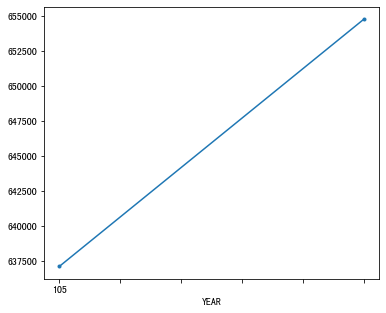

In [79]:
fig,ax = plt.subplots(figsize=(6,5))
df.groupby(['YEAR']).mean()['INC'].plot(ax=ax, style='.-')

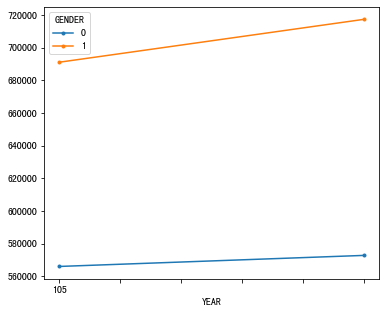

In [76]:
fig,ax = plt.subplots(figsize=(6,5))
df.groupby(['YEAR','GENDER']).mean()['INC'].unstack().plot(ax=ax, style='.-')

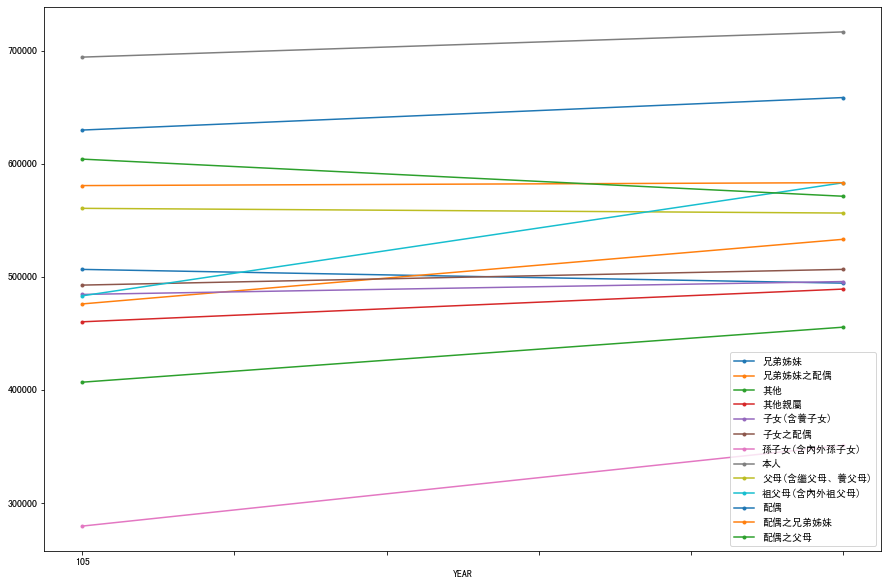

In [94]:
fig,ax = plt.subplots(figsize=(15,10))
ax.ticklabel_format(useOffset=False)
df.groupby(['YEAR','HH_STATUS']).mean()['INC'].unstack().plot(ax=ax, style='.-')
plt.legend()

### Scatter Plot

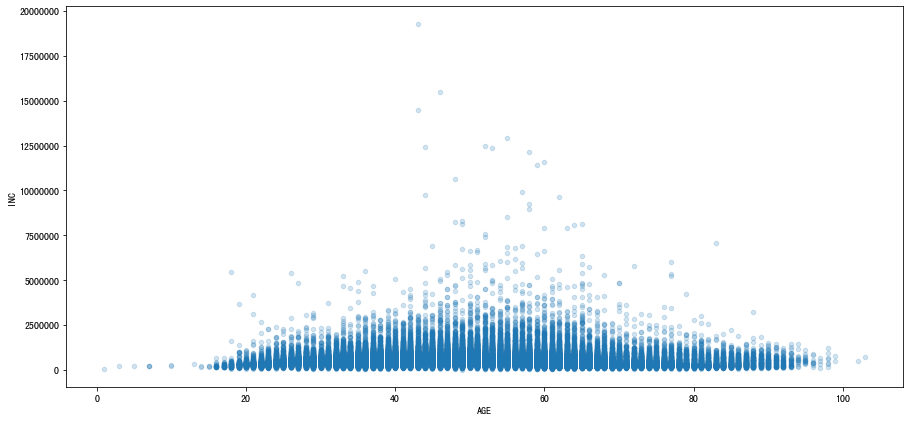

In [117]:
fig,ax = plt.subplots(figsize=(15,7))
ax.ticklabel_format(useOffset=False, style='plain')
df.plot(ax=ax, kind='scatter', x='AGE', y='INC', alpha = 0.2)
# plt.legend()

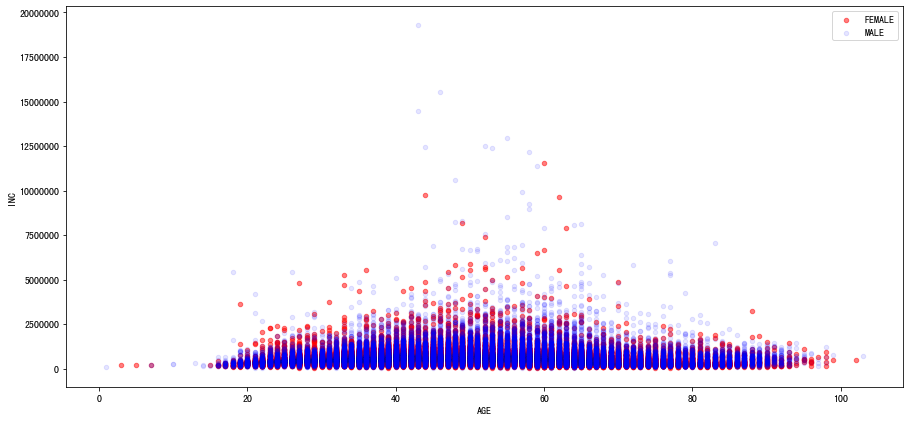

In [108]:
fig,ax = plt.subplots(figsize=(15,7))
ax.ticklabel_format(useOffset=False, style='plain')
df[df['GENDER'] == 0].plot(ax=ax, kind='scatter', x='AGE', y='INC', alpha = 0.5, color='r', label='FEMALE')
df[df['GENDER'] == 1].plot(ax=ax, kind='scatter', x='AGE', y='INC', alpha = 0.1, color='b', label='MALE')
plt.legend()

### Histogram

Text(0.5, 1.0, 'b5_博士')

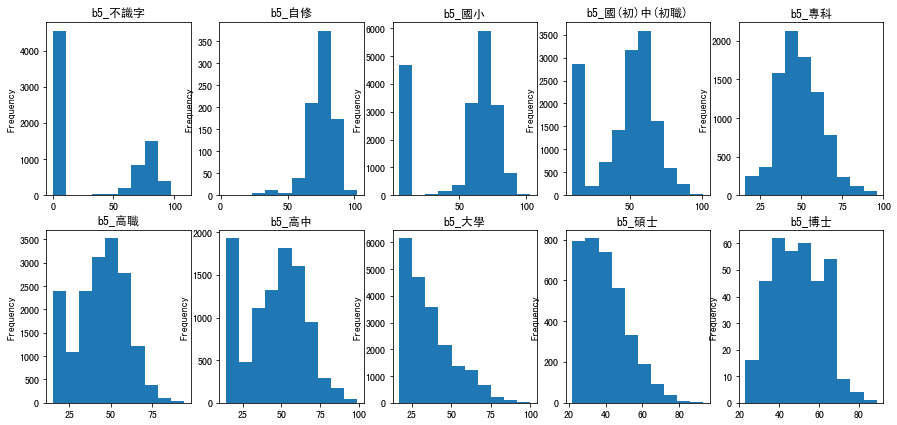

In [114]:
fig,ax = plt.subplots(2, 5, figsize=(15,7))
df[df['b5_不識字'] == 1].AGE.plot(ax=ax[0][0], kind='hist').set_title('b5_不識字')
df[df['b5_自修'] == 1].AGE.plot(ax=ax[0][1], kind='hist').set_title('b5_自修')
df[df['b5_國小'] == 1].AGE.plot(ax=ax[0][2], kind='hist').set_title('b5_國小')
df[df['b5_國(初)中(初職)'] == 1].AGE.plot(ax=ax[0][3], kind='hist').set_title('b5_國(初)中(初職)')
df[df['b5_專科(五專前三年劃記高職)'] == 1].AGE.plot(ax=ax[0][4], kind='hist').set_title('b5_專科')
df[df['b5_高職'] == 1].AGE.plot(ax=ax[1][0], kind='hist').set_title('b5_高職')
df[df['b5_高中'] == 1].AGE.plot(ax=ax[1][1], kind='hist').set_title('b5_高中')
df[df['b5_大學'] == 1].AGE.plot(ax=ax[1][2], kind='hist').set_title('b5_大學')
df[df['b5_碩士'] == 1].AGE.plot(ax=ax[1][3], kind='hist').set_title('b5_碩士')
df[df['b5_博士'] == 1].AGE.plot(ax=ax[1][4], kind='hist').set_title('b5_博士')

### Bar Plot

In [119]:
len(df.HH_STATUS.unique())

13

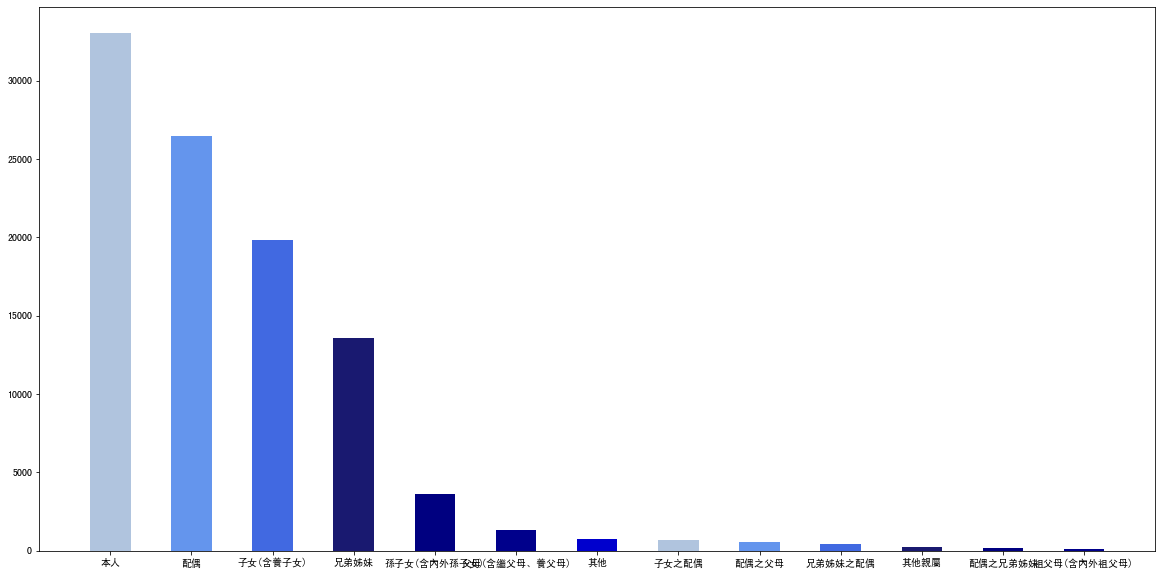

In [126]:
fig,ax = plt.subplots(figsize=(20,10))

plt.bar(df.HH_STATUS.unique(),
        df.HH_STATUS.value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'],
#         orientation='horizontal'
       )
plt.show()

### Pie Plot

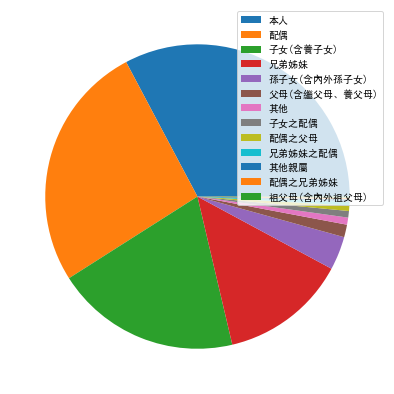

In [133]:
fig,ax = plt.subplots(figsize=(30,7))

separated = (.1,0,0,0,0,0,0)
plt.pie(df.HH_STATUS.value_counts(), textprops = {"fontsize" : 12})
plt.legend(labels = df.HH_STATUS.unique(), loc='upper right')
plt.show()

## Using `seaborn`
### Covariance Matrix w/ Heatmap

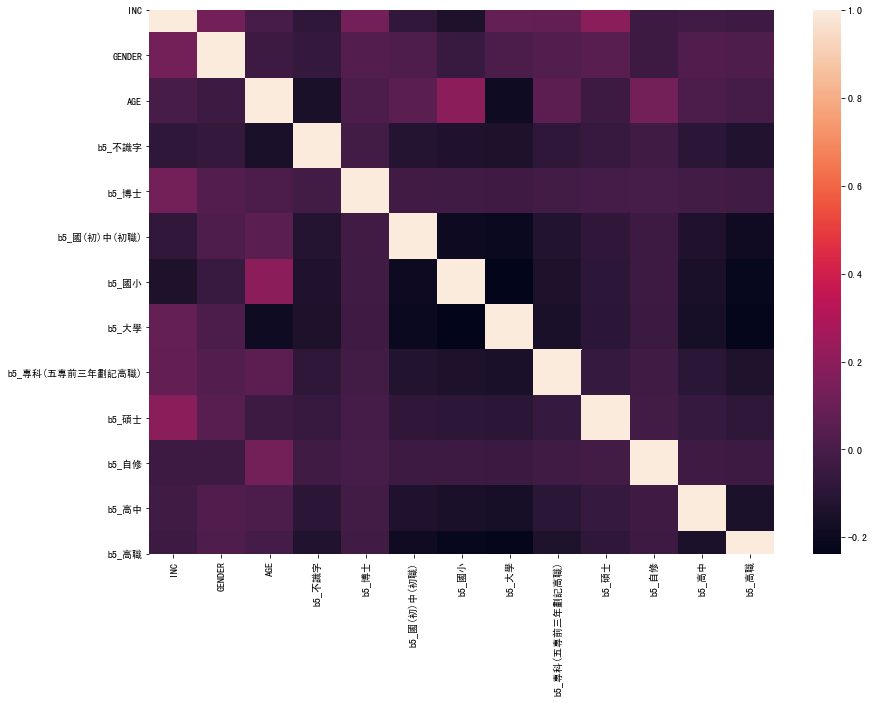

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[analyze_cols].corr())
plt.show()

### Regression Plot

In [135]:
tips = sns.load_dataset('tips')

In [136]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.0,Female,Yes,Sat,Dinner,2
241,22.67,2.0,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


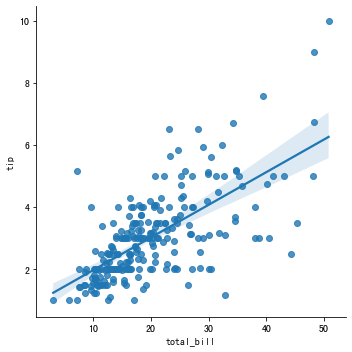

In [137]:
sns.lmplot(x='total_bill', y='tip', data=tips)

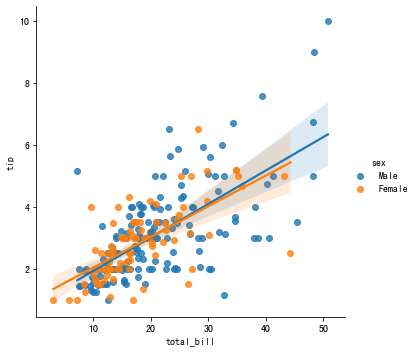

In [138]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')